In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Загрузим очищенную выборку

In [3]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)
df = wine['frame']
X = wine['data']
Y = wine['target']
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


Проверим пропуски

In [ ]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Построим матрицу корреляции

<Axes: >

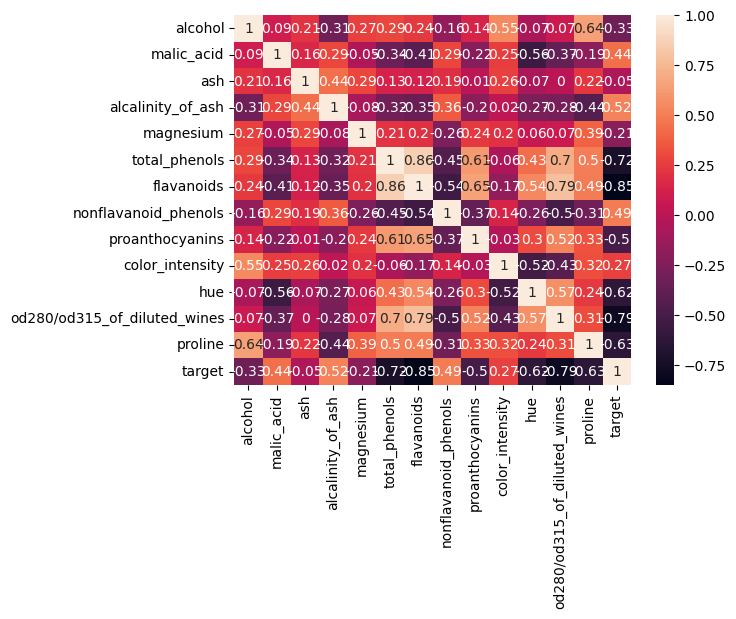

In [ ]:
dfc=df.corr().round(2)
sns.heatmap(data=dfc,annot=True)

<Axes: >

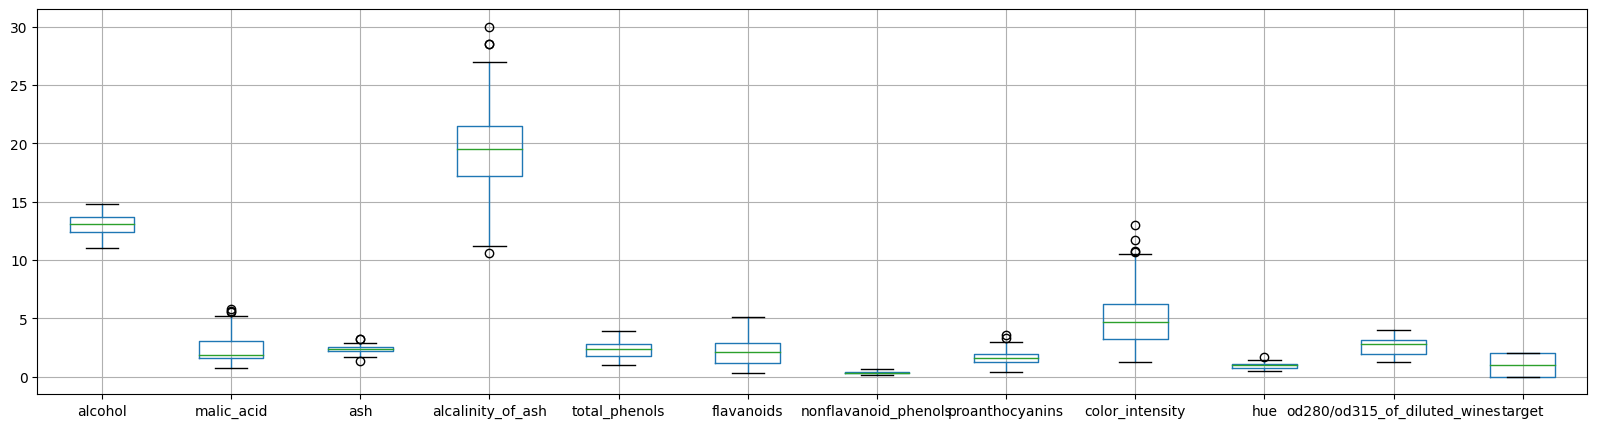

In [ ]:
plt.figure(figsize=(20, 5))
df.drop(columns=['proline', 'magnesium']).boxplot()

<Axes: >

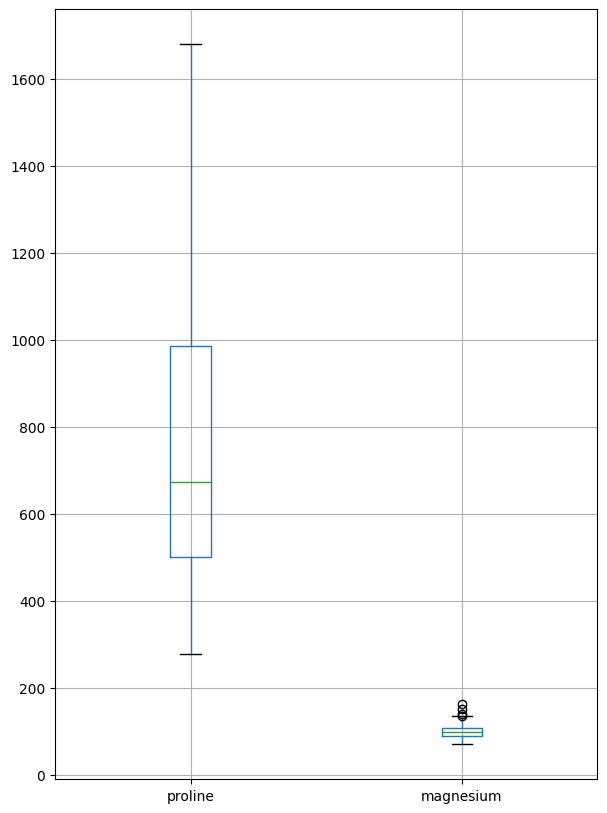

In [ ]:
plt.figure(figsize=(7, 10))
df.boxplot(column=['proline', 'magnesium'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [ ]:
X_train.shape

(142, 13)

Создадим модель DecisionTree

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
dtf.fit(X_train,Y_train)
pred_1=dtf.predict(X_test)

Построим матрицу ошибки

In [ ]:
df1=pd.crosstab(Y_test,pred_1)
df1

col_0,0,1,2
target,,,
0,12,3,2
1,0,11,0
2,0,1,7


Выполним оценку

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print('accuracy',accuracy_score(Y_test,pred_1))
print('precision',precision_score(Y_test,pred_1,average=None))
print('recall',recall_score(Y_test,pred_1,average=None))

accuracy 0.8333333333333334
precision [1.         0.73333333 0.77777778]
recall [0.70588235 1.         0.875     ]


Общий отчёт, проанализируйте результат

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred_1), '\n')
print(cross_val_score(dtf, X, Y, scoring='f1_macro'))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        17
           1       0.65      1.00      0.79        11
           2       0.86      0.75      0.80         8

    accuracy                           0.81        36
   macro avg       0.83      0.82      0.80        36
weighted avg       0.86      0.81      0.81        36
 

[0.94515263 0.82845466 0.83112875 0.91398745 0.86450742]


**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train, Y_train)
pred_2=abc.predict(X_test)
print(classification_report(Y_test,pred_2), '\n')
print(cross_val_score(abc, X, Y, scoring='f1_macro'))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.75      0.82      0.78        11
           2       1.00      0.75      0.86         8

    accuracy                           0.86        36
   macro avg       0.88      0.84      0.85        36
weighted avg       0.87      0.86      0.86        36
 

[0.65098039 0.91977808 0.91514687 0.52236958 0.97096189]


***KNeighbors***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knb = KNeighborsClassifier()
knb.fit(X_train,Y_train)
pred_3=knb.predict(X_test)
print(classification_report(Y_test,pred_3), '\n')
print(cross_val_score(knb, X, Y, scoring='f1_macro'))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.75      0.55      0.63        11
           2       0.40      0.50      0.44         8

    accuracy                           0.67        36
   macro avg       0.64      0.62      0.63        36
weighted avg       0.69      0.67      0.67        36

[0.71825397 0.64574511 0.62539683 0.62828283 0.73586207]


**GradientBoosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
pred_4=gbc.predict(X_test)
print(classification_report(Y_test,pred_4), '\n')
print(cross_val_score(gbc, X, Y, scoring='f1_macro'))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      0.91      0.87        11
           2       0.89      1.00      0.94         8

    accuracy                           0.92        36
   macro avg       0.91      0.93      0.92        36
weighted avg       0.92      0.92      0.92        36
 

[0.91816718 0.94515263 0.86036839 0.97401299 0.97401299]


In [ ]:
from sklearn.model_selection import GridSearchCV

**DecisionTree optimal params**

In [ ]:
param_grid1 = {
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy','log_loss'],
    'random_state' : [0,1,2,5,10]
}

CV_dtf = GridSearchCV(estimator=dtf, param_grid=param_grid1, cv=12)
CV_dtf.fit(X, Y)

GridSearchCV(cv=12, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'random_state': [0, 1, 2, 5, 10],
                         'splitter': ['best', 'random']})

In [ ]:
CV_dtf.best_score_

0.9444444444444445

In [ ]:
CV_dtf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'random_state': 2,
 'splitter': 'random'}

In [ ]:
dtf = DecisionTreeClassifier(random_state=2, criterion='gini', max_depth=5, max_features=None, splitter='random')
dtf.fit(X_train, Y_train)
pred_1 = dtf.predict(X_test)
print(classification_report(Y_test,pred_1), '\n')
print(cross_val_score(dtf, X, Y, scoring='f1_macro'))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.82      0.82      0.82        11
           2       1.00      0.88      0.93         8

    accuracy                           0.89        36
   macro avg       0.90      0.88      0.89        36
weighted avg       0.89      0.89      0.89        36
 

[0.88641604 0.91977808 0.86211938 0.97401299 0.85890653]


**AdaBoost optimal params**

In [ ]:
param_grid2 = {
    'n_estimators': [30,40,50,60,70,80,90,100,110],
    'learning_rate': [0.1, 0.5, 1.0, 1.5, 2.0],
    'random_state': [0,1,3,5,7,10]
}

CV_abc = GridSearchCV(estimator=abc, param_grid=param_grid2, cv=12)
CV_abc.fit(X, Y)

GridSearchCV(cv=12, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0, 1.5, 2.0],
                         'n_estimators': [30, 40, 50, 60, 70, 80, 90, 100, 110],
                         'random_state': [0, 1, 3, 5, 7, 10]})

In [ ]:
CV_abc.best_score_

0.9555555555555556

In [ ]:
CV_abc.best_params_

{'learning_rate': 0.5, 'n_estimators': 60, 'random_state': 0}

In [ ]:
abc = AdaBoostClassifier(learning_rate=0.5, n_estimators=60, random_state=0)
abc.fit(X_train, Y_train)
pred2 = abc.predict(X_test)
print(classification_report(Y_test,pred_2), '\n')
print(cross_val_score(abc, X, Y, scoring='f1_macro'))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.75      0.82      0.78        11
           2       1.00      0.75      0.86         8

    accuracy                           0.86        36
   macro avg       0.88      0.84      0.85        36
weighted avg       0.87      0.86      0.86        36
 

[0.91652174 0.91514687 0.91621214 0.94747475 1.        ]


**KNeighbors optimal params**

In [ ]:
param_grid3 = {
    'n_neighbors': [2,5,7,10,12,15],
    'weights': ['uniform', 'distance', None],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [5,10,20,30,40,50]
}

CV_knb = GridSearchCV(estimator=knb, param_grid=param_grid3, cv=12)
CV_knb.fit(X, Y)

GridSearchCV(cv=12, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 20, 30, 40, 50],
                         'n_neighbors': [2, 5, 7, 10, 12, 15],
                         'weights': ['uniform', 'distance', None]})

In [ ]:
CV_knb.best_score_

0.7698412698412699

In [ ]:
CV_knb.best_params_

{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 2, 'weights': 'distance'}

In [ ]:
knb = KNeighborsClassifier(algorithm='auto', leaf_size=5, n_neighbors=2, weights='distance')
knb.fit(X_train,Y_train)
pred_3=knb.predict(X_test)
print(classification_report(Y_test,pred_3), '\n')
print(cross_val_score(knb, X, Y, scoring='f1_macro'))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.69      0.82      0.75        11
           2       0.62      0.62      0.62         8

    accuracy                           0.75        36
   macro avg       0.73      0.74      0.73        36
weighted avg       0.76      0.75      0.75        36
 

[0.80371184 0.63163031 0.65010893 0.67301587 0.80277778]


**GradientBoosting optimal params**

In [ ]:
param_grid4 = {
    'n_estimators': [60,80,100,120],
    'learning_rate': [0.1,0.2,0.5,1,2],
    'min_samples_leaf': [1,2,5],
    'max_depth': [3,5,8,10]
}

CV_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid4, cv=3)
CV_gbc.fit(X, Y)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1, 2],
                         'max_depth': [3, 5, 8, 10],
                         'min_samples_leaf': [1, 2, 5],
                         'n_estimators': [60, 80, 100, 120]})

In [ ]:
CV_gbc.best_score_

0.9438794726930321

In [ ]:
CV_gbc.best_params_

{'learning_rate': 2, 'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 60}

In [ ]:
gbc = GradientBoostingClassifier(learning_rate=2, max_depth=3, min_samples_leaf=1, n_estimators=60)
gbc.fit(X_train,Y_train)
pred_4=gbc.predict(X_test)
print(classification_report(Y_test,pred_4), '\n')
print(cross_val_score(gbc, X, Y, scoring='f1_macro'))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36
 

[0.94405594 0.94515263 0.94747475 1.         0.97401299]


**VotingClassifier**

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
ereg = VotingClassifier(estimators=[('dtf', dtf), ('abc', abc), ('knb', knb), ('gbc', gbc)])
ereg.fit(X_train, Y_train)
pred_5 = ereg.predict(X_test)
print(classification_report(Y_test,pred_5))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.91      0.91      0.91        11
           2       1.00      1.00      1.00         8

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36

